# DATA SCIENCE RESEARCH METHODS - 243675

The PAMAP2 Physical Activity Monitoring dataset  contains data of 18 different physical activities (such as walking, cycling, playing soccer etc) performed by 9 subjects wearing 3 inertial measurement units (IMU) and a heart rate monitor. This data is stored in individual text files per subject. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data).

Assuming the goal is to develop hardware and/or software which can determine the amount (using start/end times and heart rates) and type of physical activity carried out by an individual, what actionable insights can you derive from the dataset?

Specific Requirements

You are required to:

1 - Carry out thorough exploratory data analysis and appropriately handle missing or dirty data.

2 - Develop and test at least one hypothesis for a relationship between a single pair of attributes.

3 - Develop and test at least one model which uses multiple attributes to make predictions.

For this assessment I must submit a .zip file containing two files - the Jupyter notebook (.ipynb), and a .pdf of the notebook exported. My candidate number is 243675.

# Organizing and cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

To load all of the files and generate the dataframe, a list of file names must be created. Furthermore, in order to understand which activity is being analysed at each phase, a dictionary containing the names as well as numbers of each separate activity must be constructed. 

In order to have the column names for the dataframe, lists for each individual type of IMUs must also be created. IMUs for the chest, ankle, and hand will be employed. 

Then all of the separate lists must be combined to make the column collection.

In [2]:
#Load all the data into the Jupyter
all_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

#Create the activities based on the Performed Activities Summary pdf

activities = {1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

#Based on the data format(readme.pdf)each row contains 54 columns. 
#We separate these columns into the following elements.

timestamp = ["timestamp"]

activity_ID = ["activityID"]

heart_rate = ["heartrate"]

IMU_hand = ['hand_temperature', 
           'hand_Acc16_1', 'hand_Acc16_2', 'hand_Acc16_3', 
           'hand_Acc6_1', 'hand_Acc6_2', 'hand_Acc6_3', 
           'hand_Gyros_1', 'hand_Gyros_2', 'hand_Gyros_3', 
           'hand_Magnet_1', 'hand_Magnet_2', 'hand_Magnet_3',
           'hand_Orientation_1', 'hand_Orientation_2', 'hand_Orientation_3', 'hand_Orientation_4']

IMU_chest = ['chest_temperature', 
           'chest_Acc16_1', 'chest_Acc16_2', 'chest_Acc16_3', 
           'chest_Acc6_1', 'chest_Acc6_2', 'chest_Acc6_3', 
           'chest_Gyros_1', 'chest_Gyros_2', 'chest_Gyros_3', 
           'chest_Magnet_1', 'chest_Magnet_2', 'chest_Magnet_3',
           'chest_Orientation_1', 'chest_Orientation_2', 'chest_Orientation_3', 'chest_Orientation_4']

IMU_ankle = ['ankle_temperature', 
           'ankle_Acc16_1', 'ankle_Acc16_2', 'ankle_Acc16_3', 
           'ankle_Acc6_1', 'ankle_Acc6_2', 'ankle_Acc6_3', 
           'ankle_Gyros_1', 'ankle_Gyros_2', 'ankle_Gyros_3', 
           'ankle_Magnet_1', 'ankle_Magnet_2', 'ankle_Magnet_3',
           'ankle_Orientation_1', 'ankle_Orientation_2', 'ankle_Orientation_3', 'ankle_Orientation_4']

#We put all the columns together in a list. Moreover it can be seen that the len is the same as
#the information provided.

all_columns = timestamp + activity_ID + heart_rate + IMU_hand + IMU_chest + IMU_ankle 

display(all_columns)
len(all_columns)

['timestamp',
 'activityID',
 'heartrate',
 'hand_temperature',
 'hand_Acc16_1',
 'hand_Acc16_2',
 'hand_Acc16_3',
 'hand_Acc6_1',
 'hand_Acc6_2',
 'hand_Acc6_3',
 'hand_Gyros_1',
 'hand_Gyros_2',
 'hand_Gyros_3',
 'hand_Magnet_1',
 'hand_Magnet_2',
 'hand_Magnet_3',
 'hand_Orientation_1',
 'hand_Orientation_2',
 'hand_Orientation_3',
 'hand_Orientation_4',
 'chest_temperature',
 'chest_Acc16_1',
 'chest_Acc16_2',
 'chest_Acc16_3',
 'chest_Acc6_1',
 'chest_Acc6_2',
 'chest_Acc6_3',
 'chest_Gyros_1',
 'chest_Gyros_2',
 'chest_Gyros_3',
 'chest_Magnet_1',
 'chest_Magnet_2',
 'chest_Magnet_3',
 'chest_Orientation_1',
 'chest_Orientation_2',
 'chest_Orientation_3',
 'chest_Orientation_4',
 'ankle_temperature',
 'ankle_Acc16_1',
 'ankle_Acc16_2',
 'ankle_Acc16_3',
 'ankle_Acc6_1',
 'ankle_Acc6_2',
 'ankle_Acc6_3',
 'ankle_Gyros_1',
 'ankle_Gyros_2',
 'ankle_Gyros_3',
 'ankle_Magnet_1',
 'ankle_Magnet_2',
 'ankle_Magnet_3',
 'ankle_Orientation_1',
 'ankle_Orientation_2',
 'ankle_Orientation_

54

In [3]:
data_information = pd.DataFrame()
for i in all_files:
    proc_data = pd.read_table(i, header=None, sep='\s+')
    proc_data.columns = all_columns
    proc_data['subject_id'] = int(i[-5])
    data_information = data_information.append(proc_data, ignore_index=True)

data_information.reset_index(drop=True, inplace=True)
data_information.head()

,timestamp,activityID,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,...,ankle_Gyros_2,ankle_Gyros_3,ankle_Magnet_1,ankle_Magnet_2,ankle_Magnet_3,ankle_Orientation_1,ankle_Orientation_2,ankle_Orientation_3,ankle_Orientation_4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [4]:
data_information.isnull().sum()

timestamp                    0
activityID                   0
heartrate              2610265
hand_temperature         13141
hand_Acc16_1             13141
hand_Acc16_2             13141
hand_Acc16_3             13141
hand_Acc6_1              13141
hand_Acc6_2              13141
hand_Acc6_3              13141
hand_Gyros_1             13141
hand_Gyros_2             13141
hand_Gyros_3             13141
hand_Magnet_1            13141
hand_Magnet_2            13141
hand_Magnet_3            13141
hand_Orientation_1       13141
hand_Orientation_2       13141
hand_Orientation_3       13141
hand_Orientation_4       13141
chest_temperature         3563
chest_Acc16_1             3563
chest_Acc16_2             3563
chest_Acc16_3             3563
chest_Acc6_1              3563
chest_Acc6_2              3563
chest_Acc6_3              3563
chest_Gyros_1             3563
chest_Gyros_2             3563
chest_Gyros_3             3563
chest_Magnet_1            3563
chest_Magnet_2            3563
chest_Ma

As you can see from the sample of the dataframe we created, some data cleaning is necessary. 

For example, activityID should be eliminated from our dataset because this is a temporary period during which the subject was not engaged in any specific activity, as described in the readme pdf file that was provided. 


In [5]:
# Columns not meant to be cleaned
eliminate = ['activityID','activity_name','timestamp']
features = [i for i in data_information.columns if i not in eliminate]
clean_data = data_information

# By creating new data points in a given collection of data points to remove any residual NaN value cells
clean_data[features] =clean_data[features].interpolate()
display(clean_data.head())

,timestamp,activityID,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,...,ankle_Gyros_2,ankle_Gyros_3,ankle_Magnet_1,ankle_Magnet_2,ankle_Magnet_3,ankle_Orientation_1,ankle_Orientation_2,ankle_Orientation_3,ankle_Orientation_4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,104.0,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,104.0,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,104.0,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,104.0,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [6]:
#Other way to remove any residual NaN value cells
clean_data['heartrate'] = clean_data['heartrate'].bfill()
display(clean_data.head())

,timestamp,activityID,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,...,ankle_Gyros_2,ankle_Gyros_3,ankle_Magnet_1,ankle_Magnet_2,ankle_Magnet_3,ankle_Orientation_1,ankle_Orientation_2,ankle_Orientation_3,ankle_Orientation_4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,104.0,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,104.0,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,104.0,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,104.0,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [7]:
display(clean_data)

,timestamp,activityID,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,...,ankle_Gyros_2,ankle_Gyros_3,ankle_Magnet_1,ankle_Magnet_2,ankle_Magnet_3,ankle_Orientation_1,ankle_Orientation_2,ankle_Orientation_3,ankle_Orientation_4,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,104.0,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,104.0,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,104.0,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
4,8.42,0,104.0,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,161.0,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,9
2872529,100.20,0,161.0,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,9
2872530,100.21,0,161.0,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,9
2872531,100.22,0,161.0,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,9


In [8]:
clean_data.isnull().sum()

timestamp              0
activityID             0
heartrate              0
hand_temperature       0
hand_Acc16_1           0
hand_Acc16_2           0
hand_Acc16_3           0
hand_Acc6_1            0
hand_Acc6_2            0
hand_Acc6_3            0
hand_Gyros_1           0
hand_Gyros_2           0
hand_Gyros_3           0
hand_Magnet_1          0
hand_Magnet_2          0
hand_Magnet_3          0
hand_Orientation_1     0
hand_Orientation_2     0
hand_Orientation_3     0
hand_Orientation_4     0
chest_temperature      0
chest_Acc16_1          0
chest_Acc16_2          0
chest_Acc16_3          0
chest_Acc6_1           0
chest_Acc6_2           0
chest_Acc6_3           0
chest_Gyros_1          0
chest_Gyros_2          0
chest_Gyros_3          0
chest_Magnet_1         0
chest_Magnet_2         0
chest_Magnet_3         0
chest_Orientation_1    0
chest_Orientation_2    0
chest_Orientation_3    0
chest_Orientation_4    0
ankle_temperature      0
ankle_Acc16_1          0
ankle_Acc16_2          0


There are no more missing values, as we can see. We're now ready to move on to Exploratory Data Analysis.

# Exploratory Data Analysis

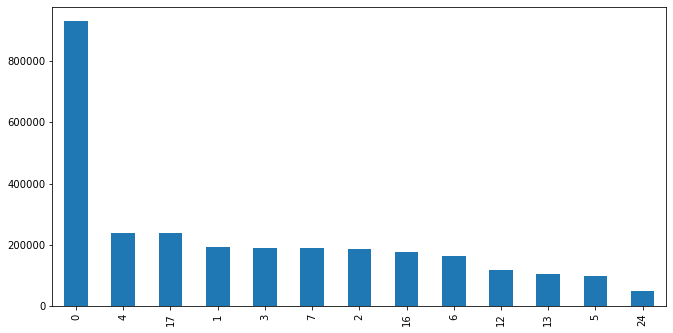

In [9]:
clean_data['activityID'].value_counts().plot(kind = "bar",figsize = (11,5.5))
plt.show()

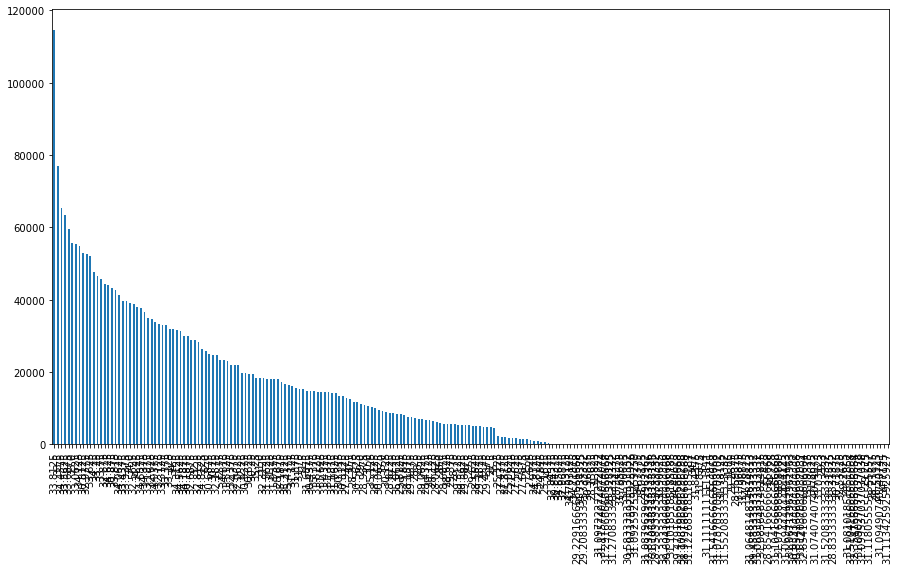

In [10]:
clean_data['hand_temperature'].value_counts().plot(kind = "bar",figsize = (15,8))
plt.show()

As we could observe in the previous graph, hand temperature graph is not very useful and we cannot draw clear conclusions. For this reason, we will focus our analysis on activityID.
Our classrooms are mostly balanced, as shown in the previous graph. As a result, we divide the data into two sets: train and test. The split fraction that will be employed is an 75 percent split for train set and a 25% split for test set.

In [11]:
train = clean_data.sample(frac=0.75, random_state=1)
test = clean_data.drop(train.index)

In [12]:
train.describe()

,timestamp,activityID,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,...,ankle_Gyros_2,ankle_Gyros_3,ankle_Magnet_1,ankle_Magnet_2,ankle_Magnet_3,ankle_Orientation_1,ankle_Orientation_2,ankle_Orientation_3,ankle_Orientation_4,subject_id
count,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,...,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06,2.154400e+06
mean,1.834774e+03,5.467201e+00,1.098843e+02,3.264772e+01,-4.970223e+00,3.589002e+00,3.165758e+00,-4.899919e+00,3.585152e+00,3.346971e+00,...,-3.437807e-02,6.519266e-03,-3.273660e+01,1.596432e+00,1.691104e+01,3.987377e-01,2.183364e-02,3.092735e-01,-1.836210e-02,4.500502e+00
std,1.105641e+03,6.332019e+00,2.588433e+01,1.845627e+00,5.990984e+00,6.285432e+00,3.839028e+00,5.999937e+00,6.058221e+00,3.835988e+00,...,5.963875e-01,1.843114e+00,1.886874e+01,2.160098e+01,2.029810e+01,3.033853e-01,5.691804e-01,3.237285e-01,4.729828e-01,2.366810e+00
min,5.640000e+00,0.000000e+00,5.700000e+01,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148780e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.375490e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00
25%,8.939400e+02,0.000000e+00,9.000000e+01,3.143750e+01,-9.036437e+00,1.294910e+00,9.692350e-01,-8.939502e+00,1.290490e+00,1.164687e+00,...,-8.297213e-02,-3.116290e-01,-4.290792e+01,-1.148760e+01,3.335375e+00,1.564150e-01,-5.834580e-01,1.101548e-02,-5.042740e-01,2.000000e+00
50%,1.791480e+03,3.000000e+00,1.080000e+02,3.312500e+01,-5.801250e+00,3.572995e+00,2.955235e+00,-5.752135e+00,3.615115e+00,3.129860e+00,...,-4.252835e-03,-2.294480e-03,-3.392910e+01,1.345180e+00,1.810690e+01,3.201465e-01,0.000000e+00,3.047375e-01,0.000000e+00,5.000000e+00
75%,2.710900e+03,7.000000e+00,1.253636e+02,3.400000e+01,-7.900730e-01,6.598623e+00,5.992920e+00,-7.310985e-01,6.598810e+00,6.246682e+00,...,8.327465e-02,6.326803e-02,-1.906630e+01,1.732990e+01,3.089493e+01,5.794402e-01,6.286810e-01,6.019273e-01,4.636602e-01,7.000000e+00
max,4.475620e+03,2.400000e+01,2.020000e+02,3.550000e+01,4.797150e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,9.000000e+00


In [13]:
test.describe()

,timestamp,activityID,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,...,ankle_Gyros_2,ankle_Gyros_3,ankle_Magnet_1,ankle_Magnet_2,ankle_Magnet_3,ankle_Orientation_1,ankle_Orientation_2,ankle_Orientation_3,ankle_Orientation_4,subject_id
count,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,...,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000,718133.000000
mean,1833.093361,5.463367,109.875855,32.648510,-4.972605,3.586046,3.161035,-4.899793,3.582759,3.341673,...,-0.034177,0.008074,-32.736643,1.533965,16.862185,0.398267,0.021007,0.309271,-0.019330,4.500406
std,1105.832936,6.329279,25.861127,1.844798,5.994432,6.284693,3.848563,5.999467,6.070119,3.843870,...,0.597898,1.843672,18.864004,21.627260,20.283995,0.303429,0.569282,0.323490,0.473386,2.367584
min,5.660000,0.000000,57.000000,24.750000,-97.791500,-90.722400,-69.093500,-61.489500,-61.868000,-60.724600,...,-13.040100,-12.446900,-171.947000,-137.908000,-102.716000,0.000003,-0.947122,-0.875978,-0.996723,1.000000
25%,890.900000,0.000000,90.000000,31.437500,-9.034910,1.285870,0.967553,-8.938550,1.279950,1.160670,...,-0.082499,-0.311390,-42.888500,-11.528200,3.251300,0.156120,-0.585529,0.010908,-0.505757,2.000000
50%,1789.080000,3.000000,108.000000,33.125000,-5.820820,3.569690,2.954000,-5.764990,3.612800,3.128470,...,-0.004176,-0.002198,-33.906500,1.309850,18.085200,0.319263,0.000000,0.304453,0.000000,5.000000
75%,2709.470000,7.000000,125.818182,34.000000,-0.794364,6.607040,5.986260,-0.741835,6.605320,6.232560,...,0.084152,0.064402,-19.066500,17.275000,30.824700,0.578750,0.626548,0.601681,0.462986,7.000000
max,4475.630000,24.000000,202.000000,35.500000,62.859600,155.438000,141.100000,34.159400,62.249100,61.944600,...,13.163500,14.389500,86.022900,116.537000,146.651000,1.000000,0.957654,0.987256,0.991155,9.000000


We'll concentrate on heart rate because it's our most important metric for tracking participants during activities, as indicated by the different signals in the dataset's readme file. With that in mind, we can see from the table that the average heart rate across the dataset is 109.88. Furthermore, the minimum and highest heart rates are 57 and 202, respectively. The quartiles revealed can be further analyzed by generating a box plot, which will help us comprehend our outliers and quartiles groups while also displaying the mean of our data's heart rate.

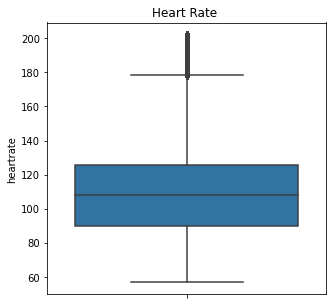

In [14]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train["heartrate"])

We can see from the box plot that the outliers have heart rates ranging from 180 to 202. Our highest quartile group of the four starts at 124, which is the end of the Inter-quartile range, and ends at 180, which also makes it our largest group when compared to the other quartiles on the box plot. Meaning that the majority of participants in the activities had a heart rate ranging from 124 to 180 beats per minute. Our third quartile group begins at the mean value of 107.4, which corresponds to the horizontal line in our box, and ends at the Inter-quartile range's end value of 124. Our second quartile group begins at 86 and ends at 124, which is the mean value of the Inter-quartile range.

Our first quartile group begins at 57 and finishes at 86, which is the start of the Inter-quartile range. Our box plot also reveals that while most individuals performed various activities statistically similarly, they did not do so across the board, which explains the large upper quartile group. 


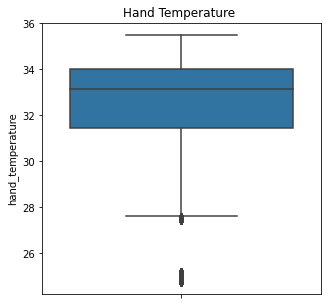

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
plt.title("Hand Temperature ")
ax = sns.boxplot(y=train["hand_temperature"])

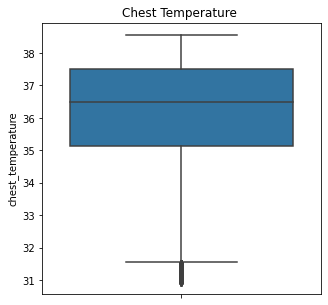

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
plt.title("Chest Temperature ")
ax = sns.boxplot(y=train["chest_temperature"])

We can see from the box plot that the outliers have hand temperature ranging from 20 to 28. Our highest quartile group of the four starts at 34, which is the end of the Inter-quartile range, and ends at 36, which also makes it our largest group when compared to the other quartiles on the box plot. In the following graphs we can see how the temperature of the chest and ankle are very similar, so the conclusions we can draw from the temperature of the three parts are practically the same.

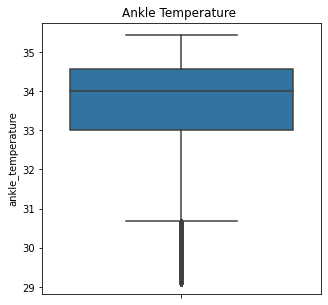

In [17]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
plt.title("Ankle Temperature ")
ax = sns.boxplot(y=train["ankle_temperature"])

Based on the conclusions obtained with the heart rate box plot we will determine which activities are the most taxing, we must create a bar chart that displays the mean heart rate values for each activity. As a result, we will be able to analyze more particular activity data. The names of the activities will be utilized to make the outcomes analysis easier.

,value_counts
0,697289
4,179176
17,179087
1,144070
3,142359
7,140985
2,138943
16,131606
6,123722
12,87663


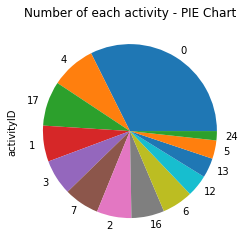

In [18]:
plt.title('Number of each activity - PIE Chart')
train.activityID.value_counts().plot(kind='pie')
train.activityID.agg(['value_counts'])

In this graph we can see the total values of each activity. It is important to note that 0 (other activities) occupies the first position. It is followed by ironing and walking. On the contrary, the last values are rope jumping and descending stairs.

<AxesSubplot:xlabel='activityID'>

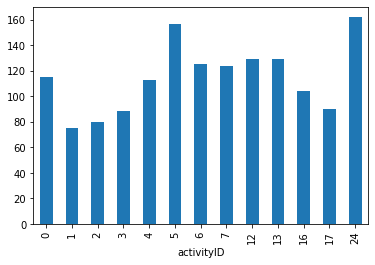

In [19]:
heartrate_activities_df = train['heartrate'].groupby(train['activityID']).mean()

heartrate_activities_df.plot(kind='bar')

We can see that 5(Running) and 24(Rope jumping) are the most energy-intensive activities. The next ones are ascending and desceding stairs (12,13).

<AxesSubplot:xlabel='activityID'>

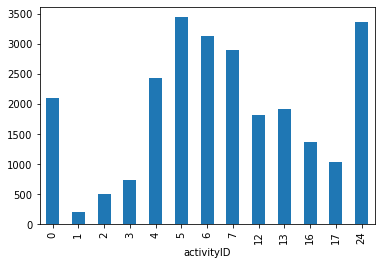

In [20]:
timestamp_activities_df = train['timestamp'].groupby(train['activityID']).mean()

timestamp_activities_df.plot(kind='bar')

We can see that 5(Running) and 24(Rope jumping) are the most timestamp activities. The next ones are cycling and Nordic walking (6,7).

<AxesSubplot:xlabel='activityID'>

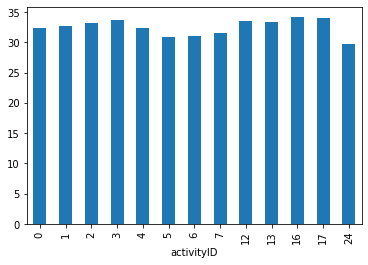

In [21]:
timestamp_activities_df = train['hand_temperature'].groupby(train['activityID']).mean()

timestamp_activities_df.plot(kind='bar')

<AxesSubplot:xlabel='activityID'>

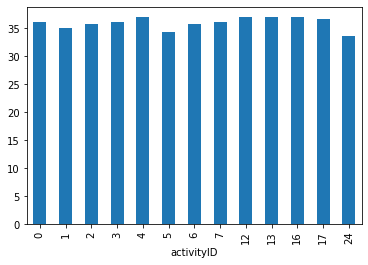

In [22]:
timestamp_activities_df = train['chest_temperature'].groupby(train['activityID']).mean()

timestamp_activities_df.plot(kind='bar')

We can see that the temperatures are between 32 and 38 and are very similar. Even looking at the different temperature positions, no clear conclusions can be drawn, as the oscillation is not significant.

<AxesSubplot:xlabel='activityID'>

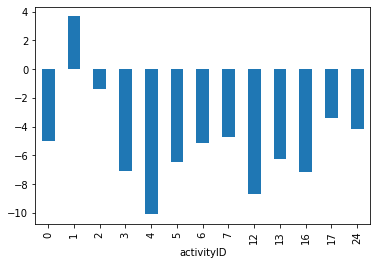

In [23]:
timestamp_activities_df = train['hand_Acc16_1'].groupby(train['activityID']).mean()

timestamp_activities_df.plot(kind='bar')

<AxesSubplot:xlabel='activityID'>

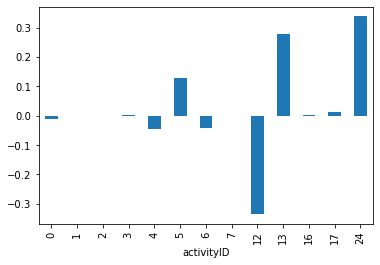

In [24]:
timestamp_activities_df = train['hand_Gyros_1'].groupby(train['activityID']).mean()

timestamp_activities_df.plot(kind='bar')

We can see that for hand_Acc16_1 and hand_Gyros_1 the difference between the different activities is very significant. For hand_Acc16_1 only lying is between positive intervals, while the rest of the activities are between 0 and -10. On the other hand, for hand_Gyros_1 we can observe that rope jumping, descending stairs and running are the only ones with positive values. The rest of the activities have null or insignificant values, while ascending stairs has an opposite correlation to its opposite activity, reaching the same values but in a different direction.

<AxesSubplot:xlabel='activityID'>

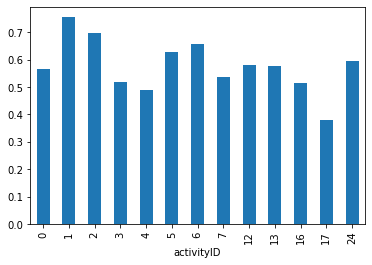

In [25]:
timestamp_activities_df = train['hand_Orientation_1'].groupby(train['activityID']).mean()

timestamp_activities_df.plot(kind='bar')

We can see that the hand_Orientation_1 for all the activities are between 0.4 and 0.8 and are very similar.Moreover it can be seen that lying(higher) is twice as high as ironing(lower), while the rest are at similar values.

To investigate our data further and look for anomalies, we must create a heat map that shows whether our data has any relationships between it.

<ipython-input-26-20d30ec81944>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


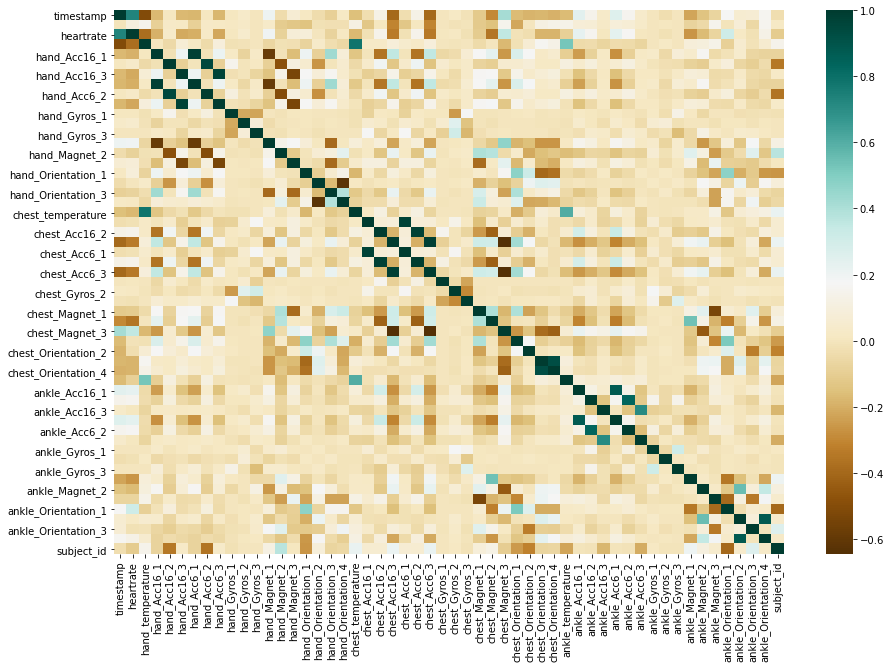

In [26]:
from pandas.plotting import scatter_matrix
df_corr = train.corr()
df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

On one hand the gyroscopes do not correlate with any of our other data, and they appear to be unnecessary in our scenario. On the other hand, we can comprehend the relationship between hand accelerometers and temperature.
Moreover, the heart rate appear to be linked to chest magnetometers.

We can see that the most timestamp activities are 24, 5, 6 and 7.

<ipython-input-27-66fd3986e22d>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)


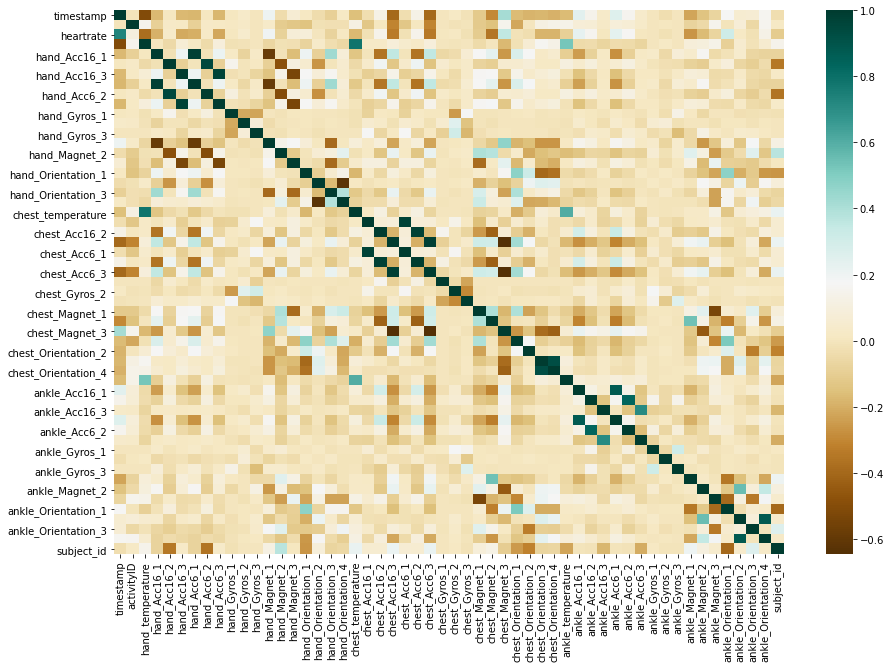

In [27]:
from pandas.plotting import scatter_matrix
df_corr = train.corr()
df_corr = df_corr.drop(['heartrate'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

We can see that performing the heat map for other variables shows us practically the same relationships, so there is no need to perform further heat mapping.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartrate', ylabel='Density'>

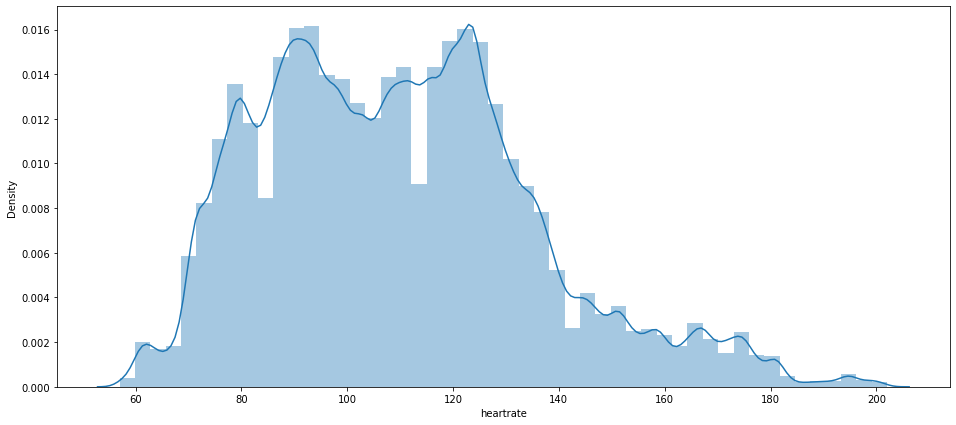

In [28]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(train.iloc[:,2])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='heartrate', ylabel='Density'>

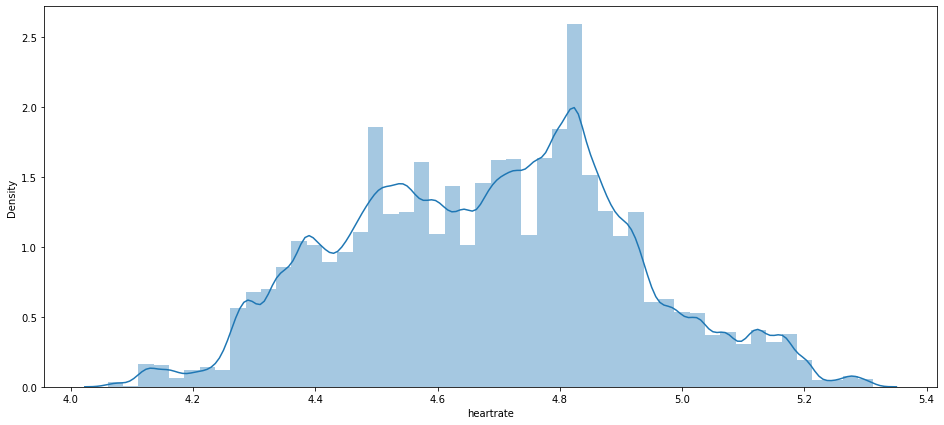

In [29]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(train.iloc[:,2]))

All these plots show how the different values in the second column are distributed. Plot the log of this. Normalise this distribution a bit more, and centre it a bit more in the middle.

These two graphs show us the following. The first one shows how the values in the second column (heartrate) are distributed. The second graph shows the same data based on the logarithm of the function. This is done in order to normalise the distribution more and to be able to centre it more in the middle, and to draw more concrete conclusions. In the graphs below we will see the differences between these graphs for hand, chest and ankle temperatures.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hand_temperature', ylabel='Density'>

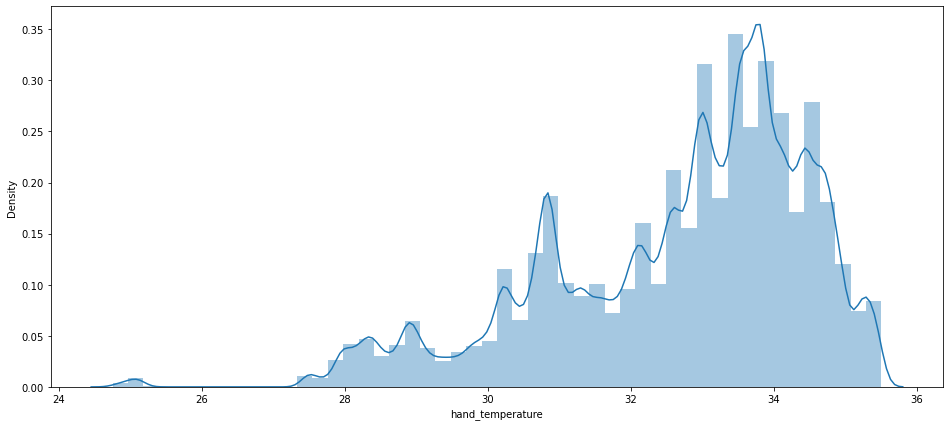

In [30]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(train.iloc[:,3])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hand_temperature', ylabel='Density'>

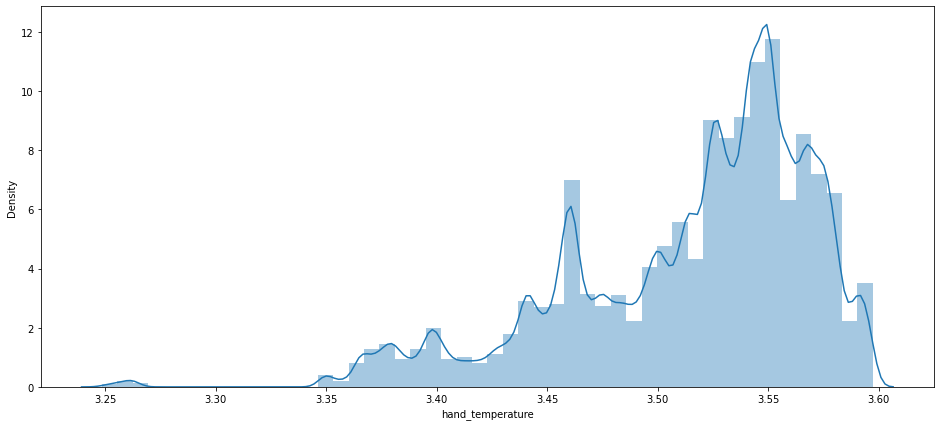

In [31]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(train.iloc[:,3]))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chest_temperature', ylabel='Density'>

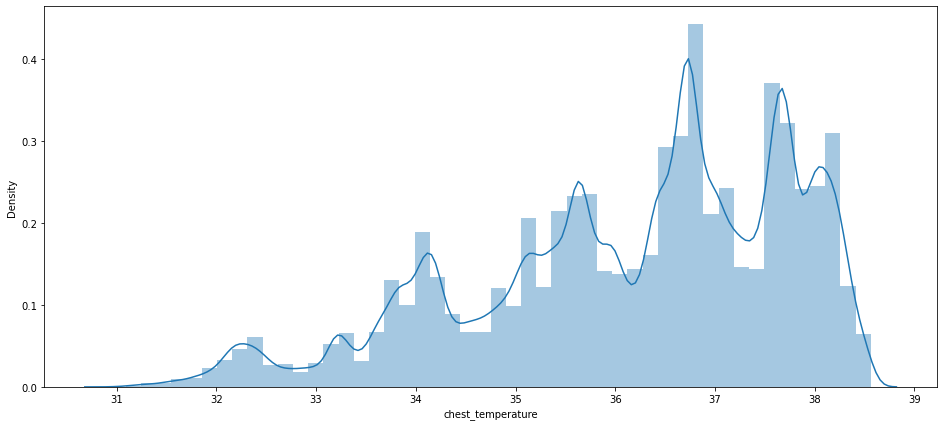

In [32]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(train.iloc[:,20])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chest_temperature', ylabel='Density'>

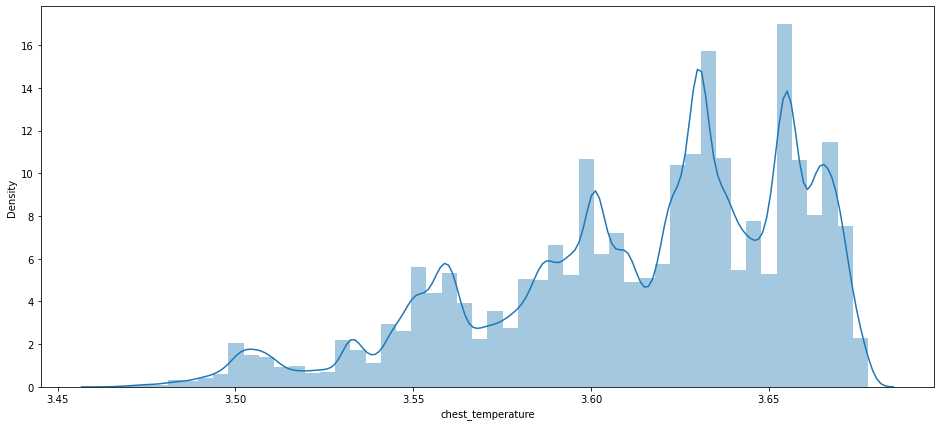

In [33]:
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(train.iloc[:,20]))

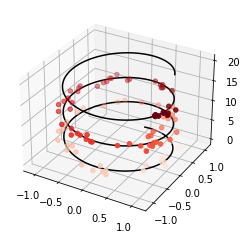

In [34]:
ax = plt.axes(projection='3d')

zline = np.linspace(0, 20, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'black')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

A few Surface graphs and Wireframes 3D which can be used to have an idea about the data, how big it is, and some interesting numerical data.

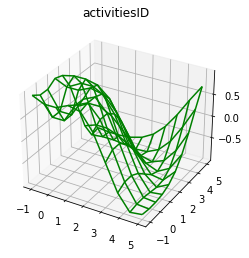

In [35]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
 
# x and y axis
x = np.linspace(-1, 5, 10)
y = np.linspace(-1, 5, 10)
  
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='green')
ax.set_title('activitiesID');

In [36]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


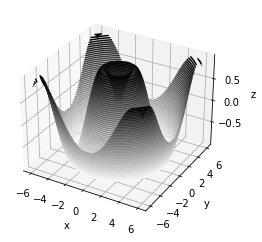

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

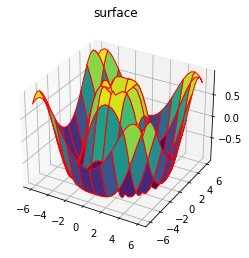

In [38]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3,
                cmap='viridis', edgecolor='red')
ax.set_title('surface');


In [39]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

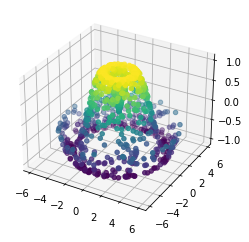

In [40]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=1);

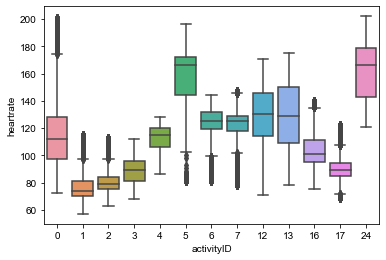

In [41]:
sns.boxplot(x='activityID',y='heartrate',data = train)
sns.set(font_scale = 0.75)

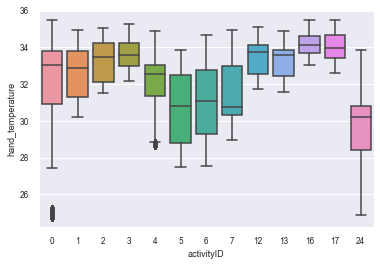

In [42]:
sns.boxplot(x='activityID',y='hand_temperature',data = train)
sns.set(font_scale = 0.75)

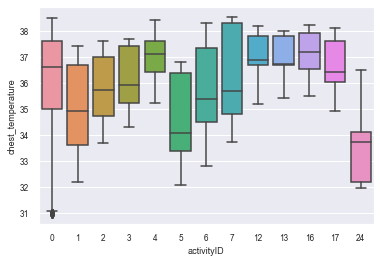

In [43]:
sns.boxplot(x='activityID',y='chest_temperature',data = train)
sns.set(font_scale = 0.75)

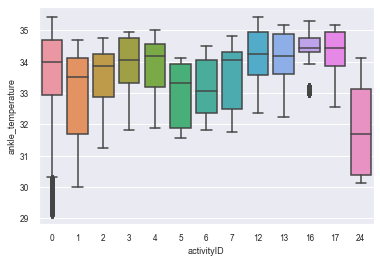

In [44]:
sns.boxplot(x='activityID',y='ankle_temperature',data = train)
sns.set(font_scale = 0.75)

These 4 boxplots show the frequency values between the heartrate, hand, ankle and chest temperature sensors for each activity. It is interesting to see the conclusions that can be drawn by looking at these four graphs:
- Activities 5(running) and 24(rope jumping) are the ones with the highest heartrate.
- Heart rates range between 60 and 210
- The hand temperature ranges are fairly constant, except for activity 24, which has lower values.
- The ankle, chest and hand temperatures are very similar for all activities.
- The highest temperatures are obtained for the chest, reaching values of 36


Text(0, 0.5, 'Frequency')

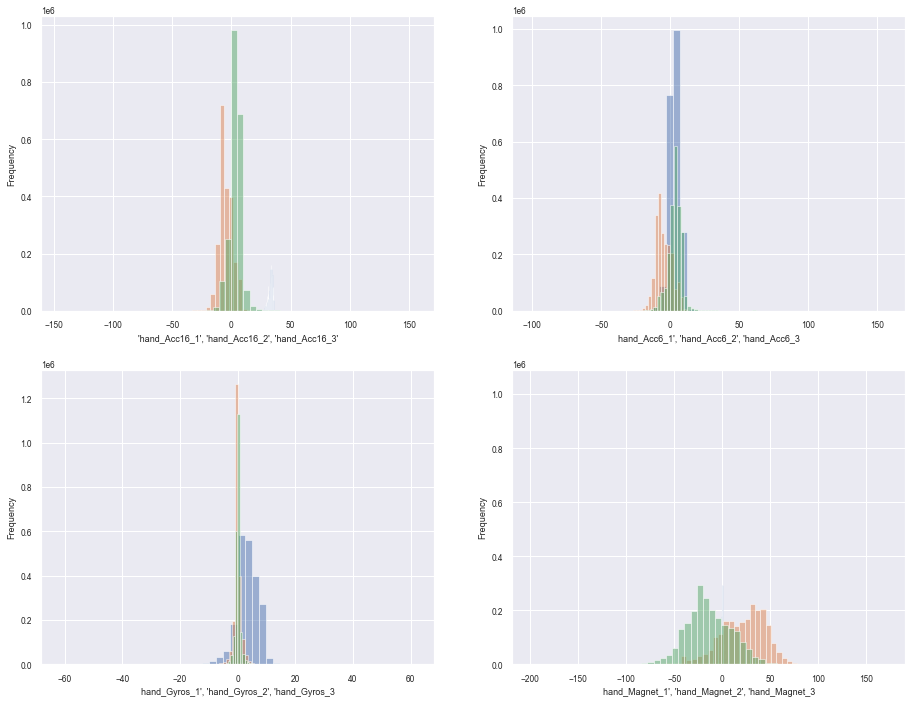

In [46]:
plt.figure(figsize=(4,3))
plt.subplots_adjust(2,2,5,5)

plt.subplot(221)
for name_c in train.columns[3:6]:
  train[name_c].hist(bins=50,alpha=0.5)
  #train.price.plot(kind="hist",color='lightblue')
plt.xlabel("'hand_Acc16_1', 'hand_Acc16_2', 'hand_Acc16_3'")
plt.ylabel("Frequency")

plt.subplot(222)
for name_c in train.columns[6:9]:
  train[name_c].hist(bins=50,alpha=0.5)
plt.xlabel("hand_Acc6_1', 'hand_Acc6_2', 'hand_Acc6_3")
plt.ylabel("Frequency")

plt.subplot(223)
for name_c in train.columns[9:12]:
  train[name_c].hist(bins=50,alpha=0.5)
plt.xlabel("hand_Gyros_1', 'hand_Gyros_2', 'hand_Gyros_3")
plt.ylabel("Frequency")


plt.subplot(224)
for name_c in train.columns[12:15]:
  train[name_c].hist(bins=50,alpha=0.5)
plt.xlabel("hand_Magnet_1', 'hand_Magnet_2', 'hand_Magnet_3")
plt.ylabel("Frequency")


# HYPOTHESYS TESTING

# Hypothesis 1<br>
$H_0$(Null) : The mean of all the activities has no big difference between them <br>
$H_1$(Alternate) : The mean of all the activities has big difference between them

In [47]:
from scipy import stats

In [48]:
train.columns[0:53]

Index(['timestamp', 'activityID', 'heartrate', 'hand_temperature',
       'hand_Acc16_1', 'hand_Acc16_2', 'hand_Acc16_3', 'hand_Acc6_1',
       'hand_Acc6_2', 'hand_Acc6_3', 'hand_Gyros_1', 'hand_Gyros_2',
       'hand_Gyros_3', 'hand_Magnet_1', 'hand_Magnet_2', 'hand_Magnet_3',
       'hand_Orientation_1', 'hand_Orientation_2', 'hand_Orientation_3',
       'hand_Orientation_4', 'chest_temperature', 'chest_Acc16_1',
       'chest_Acc16_2', 'chest_Acc16_3', 'chest_Acc6_1', 'chest_Acc6_2',
       'chest_Acc6_3', 'chest_Gyros_1', 'chest_Gyros_2', 'chest_Gyros_3',
       'chest_Magnet_1', 'chest_Magnet_2', 'chest_Magnet_3',
       'chest_Orientation_1', 'chest_Orientation_2', 'chest_Orientation_3',
       'chest_Orientation_4', 'ankle_temperature', 'ankle_Acc16_1',
       'ankle_Acc16_2', 'ankle_Acc16_3', 'ankle_Acc6_1', 'ankle_Acc6_2',
       'ankle_Acc6_3', 'ankle_Gyros_1', 'ankle_Gyros_2', 'ankle_Gyros_3',
       'ankle_Magnet_1', 'ankle_Magnet_2', 'ankle_Magnet_3',
       'ankle_Orient

In [49]:
for i in train.columns[0:53]:
    print('P value and T test of '+i+' and activities:',stats.ttest_ind(train['activityID'].values,train[i].values))

P value and T test of timestamp and activities: Ttest_indResult(statistic=-2428.4462147504214, pvalue=0.0)
P value and T test of activityID and activities: Ttest_indResult(statistic=0.0, pvalue=1.0)
P value and T test of heartrate and activities: Ttest_indResult(statistic=-5751.445800913903, pvalue=0.0)
P value and T test of hand_temperature and activities: Ttest_indResult(statistic=-6048.842195996708, pvalue=0.0)
P value and T test of hand_Acc16_1 and activities: Ttest_indResult(statistic=1757.4729618640563, pvalue=0.0)
P value and T test of hand_Acc16_2 and activities: Ttest_indResult(statistic=308.9905875664548, pvalue=0.0)
P value and T test of hand_Acc16_3 and activities: Ttest_indResult(statistic=456.18810400444573, pvalue=0.0)
P value and T test of hand_Acc6_1 and activities: Ttest_indResult(statistic=1744.403441528405, pvalue=0.0)
P value and T test of hand_Acc6_2 and activities: Ttest_indResult(statistic=315.2270201642012, pvalue=0.0)
P value and T test of hand_Acc6_3 and acti

Taking into account that the P-value of all activities is 0, we can reject the null hypothesis and state that there is a large difference between the means of all activities for each item.

# Hypothesis 2<br>
$H_0$(Null) : The hand temperature mean of all the activities has no big difference between them <br>
$H_1$(Alternate) : The hand temperature mean of all the activities has a big difference between them.

In [50]:
import scipy.stats

R = train['hand_temperature'].mean() / (train['hand_temperature'].std() / math.sqrt(train['hand_temperature'].count() ))
pValue = 1 - scipy.stats.norm.cdf(R)

if pValue > 0.05:
    print("The p_value is ", pValue, " and h1 is rejected. The hand temperature mean of all the activities has no big difference between them.")
else:
    print("The p_value is ", pValue, " and h0 is rejected. The hand temperature mean of all the activities has a big difference between them.")


The p_value is  0.0  and h0 is rejected. The hand temperature mean of all the activities has a big difference between them.


As we can see in this second hypothesis, there is a difference between the hand temperature for each activity. This is another approach to calculate a hypothesis. To use this method, we find the previously defined R, and calculate the p-value by subtracting one minus the normal distribution from that calculated value. Likewise, since it is less than 0.05, we can reject our null hypothesis and stick with the alternative one.

# MODELLING



The standard normal distribution is followed by StandardScaler (SND). As a result, it sets the mean to 0 and scales the data to unit variance. We can remove outliers with RobustScaler() and then preprocess the data with StandardScaler or MinMaxScaler.

The train data is: (2298026, 49) The test data is: (574507, 49)
X_train_scaled gets a mean of = -0.0 which is close to 0 and the standard deviation of = 0.99968 which is close to 1


<AxesSubplot:ylabel='Frequency'>

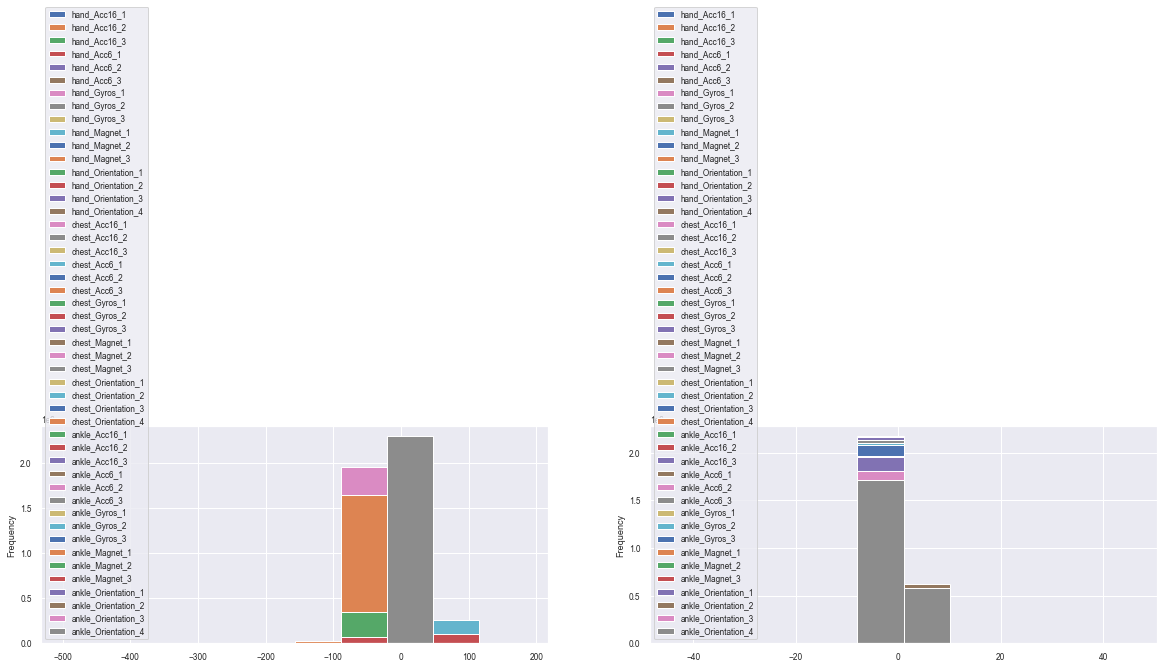

In [53]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, RobustScaler


ModelingData = clean_data.drop(['timestamp','subject_id', 'heartrate', 'hand_temperature', 'chest_temperature', 'ankle_temperature'] 
                            , axis = 1)

train_data_2 = ModelingData.sample(frac=0.8, random_state=1)
test_data_2 = ModelingData.drop(train_data_2.index)

print('The train data is:', train_data_2.shape, 'The test data is:' ,test_data_2.shape)


#Some factors must be eliminated
x_train_2 = train_data_2.drop('activityID', axis = 1)
x_test_2 = test_data_2.drop('activityID' , axis = 1)
y_train_2 = train_data_2['activityID']
y_test_2 = test_data_2['activityID']


scaler = preprocessing.StandardScaler().fit(x_train_2)
x_train_scaled = pd.DataFrame(scaler.transform(x_train_2), columns = x_train_2.columns )
x_test_scaled = scaler.transform(x_test_2)

print ('X_train_scaled gets a mean of =', round(x_train_scaled.mean(axis = 0).mean(), 5) , 'which is close to 0', 
       'and the standard deviation of =' , round(x_test_scaled.std(axis = 0).mean() , 5 ) , 'which is close to 1') 
       
fig, (ax1, ax2) = plt.subplots(1, 2)


x_train_2.plot(kind = 'hist' , ax = ax1 , figsize=(20,4))
x_train_scaled.plot(kind = 'hist' , ax = ax2 , figsize=(20,4))





# PCA - Principal Component Analysis for Dimensionality Reduction

[3693.86979917 2940.06283406 2655.63226973 2499.10843277 2388.01936323
 2246.19453537 2231.86310977 2192.55884045 2120.76558616 1976.7460276
 1885.1329564  1816.69135841 1753.78882375 1714.74776668 1676.11957795
 1602.83372992 1533.18522145 1469.35994573 1436.81612289 1387.09128872
 1309.97237875 1247.32379038 1235.2585115  1225.87066932 1152.64046389
 1128.39697172 1077.98830994 1055.48098414 1034.22490701  973.31583989
  926.37079884  879.09031443  827.76625572  800.43220726  736.39213316
  658.7704084   616.93208117  597.64617876  584.54335574  462.57301705
  366.86012528  355.49830731  324.18457586  264.55013311  244.46854007
  216.88050847  187.25707382  173.99465857]
[0.12369923 0.07836408 0.06393515 0.05662054 0.05169869 0.04574025
 0.04515844 0.04358192 0.04077455 0.03542465 0.0322172  0.02992031
 0.02788421 0.02665657 0.02546911 0.02329061 0.02131047 0.01957313
 0.01871571 0.01744271 0.01555708 0.01410465 0.0138331  0.01362364
 0.01204458 0.01154324 0.01053494 0.01009961 0.009

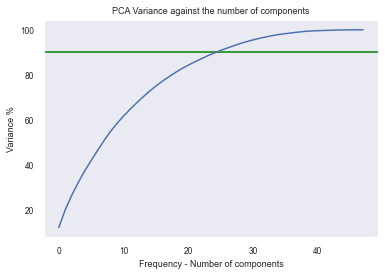

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_scaled)
variance= pca.explained_variance_ratio_
variance1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

l = plt.axhline(90, color="green")

plt.plot(variance1)
plt.grid()
plt.title("PCA Variance against the number of components")
plt.ylabel("Variance %")
plt.xlabel("Frequency - Number of components")

print(pca.singular_values_)
print(pca.explained_variance_ratio_)
print(variance1)

x_train =pca.fit_transform(x_train_scaled)
x_test = pca.fit_transform(x_test_scaled)

Normally a good variance obtains values between 85 and 99 %. In our case, looking at values above 90, we can see that less than 25 values fall off, but the rest get a higher variance. Moreover, this means that we have a good level of variance.



# Different Models

In this section we will evaluate and train a few models as you can see below.

**Linear Regression for Multioutput Regression**

The model fits a linear regression to the multioutput regression dataset and then uses the trained model to produce a single prediction.

In [55]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

train, test = make_regression(n_samples = 1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
model = LinearRegression()
model.fit(train, test)
row = [0.21947749, 0.32948997, 0.81560036, 0.440956, -0.0606303, -0.29257894, -0.2820059, -0.00290545, 0.96402263, 0.04992249]
yhat = model.predict([row])
print(yhat[0])

[50.06781717 64.564973  ]


**k-Nearest Neighbors for Multioutput Regression**

This example fits a k-nearest neighbors model to the multioutput regression dataset and then uses the trained model to produce a single prediction. 

In [56]:
from sklearn.neighbors import KNeighborsRegressor
model2 = KNeighborsRegressor()
model.fit(train, test)
row2 = [0.21947749, 0.32948997, 0.81560036, 0.440956, -0.0606303, -0.29257894, -0.2820059, -0.00290545, 0.96402263, 0.04992249]
yhat2 = model.predict([row2])
print(yhat2[0])

[50.06781717 64.564973  ]


**Decision Tree for Multioutput Regression**

The example below fits a decision tree model to the multioutput regression dataset and then uses the trained model to produce a single prediction. 


In [57]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train, test)
row3 = [0.21947749, 0.32948997, 0.81560036, 0.440956, -0.0606303, -0.29257894, -0.2820059, -0.00290545, 0.96402263, 0.04992249]
yhat3 = model.predict([row3])
print(yhat3[0])

[49.93137149 64.08484989]


**Evaluate Multioutput Regression With Cross-Validation**
We'll use 10-fold cross-validation with three repeats to fit and evaluate a DecisionTreeRegressor model on the test problem. As a score, we'll utilize the mean absolute error (MAE) performance metric. 

In [58]:
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

train, test = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=2, random_state=1, noise=0.5)
model = DecisionTreeRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, train, test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 52.121 (3.203)


The performance of the decision tree model for multioutput regression on the test problem is evaluated by running the example. The MAE's mean and standard deviation are given.

# BIBLIOGRAPHY

Archive.ics.uci.edu. 2021. UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: <http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring> [Accessed 14 December 2021].

scikit-learn. 2021. 3.1. Cross-validation: evaluating estimator performance. [online] Available at: <https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators> [Accessed 16 December 2021].

scikit-learn. 2021. 2.5. Decomposing signals in components (matrix factorization problems). [online] Available at: <https://scikit-learn.org/stable/modules/decomposition.html#decompositions> [Accessed 19 December 2021].


scikit-learn. 2021. 2.5. Decomposing signals in components (matrix factorization problems). [online] Available at: <https://scikit-learn.org/stable/modules/decomposition.html#decompositions> [Accessed 20 December 2021].

VanderPlas, J., 2021. Three-Dimensional Plotting in Matplotlib | Python Data Science Handbook. [online] Jakevdp.github.io. Available at: <https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html> [Accessed 21 December 2021].

Brownlee, J., 2021. How to Develop Multi-Output Regression Models with Python. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/multi-output-regression-models-with-python/> [Accessed 25 December 2021].

Tavares, E., 2021. Principle Component Analysis (PCA) with Scikit-Learn - Python. [online] Etav.github.io. Available at: <https://etav.github.io/python/scikit_pca.html> [Accessed 26 December 2021].

Built In. 2022. A Step-by-Step Explanation of Principal Component Analysis (PCA). [online] Available at: <https://builtin.com/data-science/step-step-explanation-principal-component-analysis> [Accessed 2 January 2022].